In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/ericwk/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
with open("data/pickle_files/peace_originators_split.pickle", "rb") as f:
    pickle_object = pickle.load(f)

In [3]:
X_train = pickle_object[0]
X_test = pickle_object[1]
y_train = pickle_object[2]
y_test = pickle_object[3]

In [4]:
ssX = StandardScaler()
ssX.fit(X_train)
X_train = ssX.transform(X_train)
X_test = ssX.transform(X_test)

In [5]:
model = LogisticRegression(random_state=42, C=1000)
scores = cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.49015748, 0.49212598, 0.51683168, 0.48514851, 0.50497018])

In [6]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.501779359430605

In [9]:
model.score(X_test, y_test)

0.48847926267281105

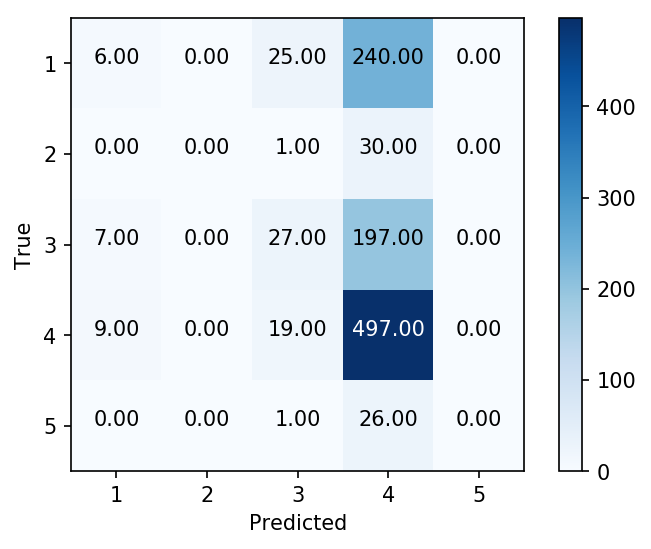

In [10]:
plt.figure(dpi=150)
cm = confusion_matrix(y_test, model.predict(X_test))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.colorbar();
plt.xticks([i for i in range(5)],[i+1 for i in range(5)])
plt.yticks([i for i in range(5)], [i+1 for i in range(5)]);
plt.ylabel("True")
plt.xlabel("Predicted");
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [11]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          1       0.27      0.02      0.04       271
          2       0.00      0.00      0.00        31
          3       0.37      0.12      0.18       231
          4       0.50      0.95      0.66       525
          5       0.00      0.00      0.00        27

avg / total       0.39      0.49      0.37      1085



/Users/ericwk/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
